In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
fashion_mnist = keras.datasets.fashion_mnist #load datasets

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # a split into testing and training

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape


(60000, 28, 28)

In [7]:
train_images[0, 23, 23]
#print(train_images)

194

In [8]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [9]:
class_names = ['T--shirt/Top', 'Trouser', 'Pullover', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
                

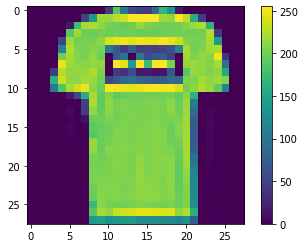

In [11]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

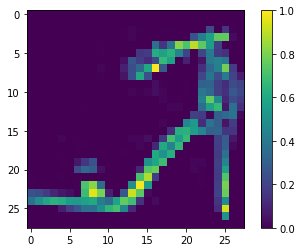

In [16]:
plt.figure()
plt.imshow(train_images[8])
plt.colorbar()
plt.grid(False)
plt.show()

Data Processing

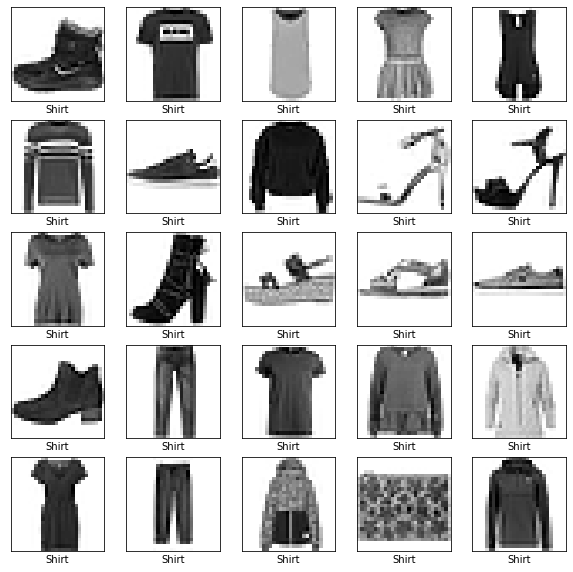

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[9]])
plt.show()

In [15]:
train_images = train_images /255.0
test_images = test_images / 255.0


Building a model

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), #input layer 1
    keras.layers.Dense(128, activation = 'relu'),  # hidden layer 2
    keras.layers.Dense(10, activation = 'softmax') # output layer 3
])

Hyperparameter Tuning

In [18]:
model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

Traning the Model

In [22]:
model.fit(train_images, train_labels, epochs = 1)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1963 - accuracy: 0.9262


Evaluate the Model

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)

print('test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3506 - accuracy: 0.8783
test accuracy:  0.8783000111579895


Making Predictions

In [29]:
predictions  = model.predict(test_images)
print(predictions[0]) #(np.argmax)

[1.4844086e-10 9.6201497e-13 3.4009305e-14 2.0146387e-14 4.3680936e-12
 6.7564142e-05 2.2749456e-12 6.3413341e-04 3.2392208e-08 9.9929833e-01]


In [26]:
test_images.shape

(10000, 28, 28)